In [1]:
import numpy as np

X = np.genfromtxt('../data/impute_bvs_simplex_offset_X5.csv', delimiter=',').T
Y = np.genfromtxt('../data/impute_bvs_simplex_offset_Y5.csv', delimiter=',')
Z = np.genfromtxt('../data/impute_bvs_simplex_offset_Z5.csv', delimiter=',')

train_data = np.genfromtxt('../data/all_samples_filtered_train.csv', delimiter=',')
train_data[train_data>0] = train_data[train_data>0]+1
train_data[train_data==-1] = 1
train_data[train_data==0] = np.nan

all_missing = np.where(np.all(np.isnan(train_data), axis=1))[0]
keep = list(set(range(train_data.shape[0]))-set(all_missing))

X = X[keep, :]
Z = Z[keep, :]


train_data = train_data[keep, :]

entry_test_data = np.genfromtxt('../data/all_samples_filtered_entry_test.csv', delimiter=',')
entry_test_data[entry_test_data>0] = entry_test_data[entry_test_data>0]+1
entry_test_data[entry_test_data==-1] = 1
entry_test_data[entry_test_data==0] = np.nan
entry_test_data = entry_test_data[keep, :]

instrument_test_data = np.genfromtxt('../data/all_samples_filtered_instrument_test.csv', delimiter=',')
instrument_test_data[instrument_test_data>0] = instrument_test_data[instrument_test_data>0]+1
instrument_test_data[instrument_test_data==-1] = 1
instrument_test_data[instrument_test_data==0] = np.nan
instrument_test_data = instrument_test_data[keep, :]

Z_mice = np.genfromtxt('../data/mice_fill.csv', delimiter=',')+1

Z_mice_round = np.round(Z_mice)
Z_mice_round[Z_mice_round<1] = 1
for i in range(n):
    col_max = np.nanmax(train_data[:, i])
    Z_mice_round[Z_mice_round[:, i]>col_max] = col_max

print(X.shape, Y.shape, Z.shape)
print(Z_mice.shape, Z_mice_round.shape)


NameError: name 'n' is not defined

In [367]:
print('Entry test', cohen_kappa_score(entry_test_data[~np.isnan(entry_test_data)], Z[~np.isnan(entry_test_data)], weights='linear'), 
      '\n', confusion_matrix(entry_test_data[~np.isnan(entry_test_data)], Z[~np.isnan(entry_test_data)]))
print('Instrument test', cohen_kappa_score(instrument_test_data[~np.isnan(instrument_test_data)], Z[~np.isnan(instrument_test_data)], weights='linear'),
      '\n', confusion_matrix(instrument_test_data[~np.isnan(instrument_test_data)], Z[~np.isnan(instrument_test_data)]))


Entry test 0.559047151297 
 [[65474 17290  4423   321     0]
 [11729 26844 11373   799     0]
 [ 4931 14950 25226  2786     1]
 [  850  3143  9962  7976     6]
 [    2     4    19    45    32]]
Instrument test 0.417988523115 
 [[14775  4810  2352   340     0]
 [ 3152  6356  3714   726     0]
 [ 2111  4620  5820  1170     0]
 [  435  1536  2876  1810     1]
 [    0     0    11     9     2]]


In [196]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

print('Sim')
print('Entry test', cohen_kappa_score(entry_test_data[~np.isnan(entry_test_data)], Zsim[~np.isnan(entry_test_data)], weights='linear'), 
      '\n', confusion_matrix(entry_test_data[~np.isnan(entry_test_data)], Zsim[~np.isnan(entry_test_data)]))
print('Instrument test', cohen_kappa_score(instrument_test_data[~np.isnan(instrument_test_data)], Zsim[~np.isnan(instrument_test_data)], weights='linear'),
      '\n', confusion_matrix(instrument_test_data[~np.isnan(instrument_test_data)], Zsim[~np.isnan(instrument_test_data)]))

print('L1')
print('Entry test', cohen_kappa_score(entry_test_data[~np.isnan(entry_test_data)], Zl1[~np.isnan(entry_test_data)], weights='linear'), 
      '\n', confusion_matrix(entry_test_data[~np.isnan(entry_test_data)], Zl1[~np.isnan(entry_test_data)]))
print('Instrument test', cohen_kappa_score(instrument_test_data[~np.isnan(instrument_test_data)], Zl1[~np.isnan(instrument_test_data)], weights='linear'),
      '\n', confusion_matrix(instrument_test_data[~np.isnan(instrument_test_data)], Zl1[~np.isnan(instrument_test_data)]))

print('L10')
print('Entry test', cohen_kappa_score(entry_test_data[~np.isnan(entry_test_data)], Zl10[~np.isnan(entry_test_data)], weights='linear'), 
      '\n', confusion_matrix(entry_test_data[~np.isnan(entry_test_data)], Zl10[~np.isnan(entry_test_data)]))
print('Instrument test', cohen_kappa_score(instrument_test_data[~np.isnan(instrument_test_data)], Zl10[~np.isnan(instrument_test_data)], weights='linear'),
      '\n', confusion_matrix(instrument_test_data[~np.isnan(instrument_test_data)], Zl10[~np.isnan(instrument_test_data)]))

print('\nMICE')
print('Entry test', cohen_kappa_score(entry_test_data[~np.isnan(entry_test_data)], Z_mice_round[~np.isnan(entry_test_data)], weights='linear'), 
      '\n', confusion_matrix(entry_test_data[~np.isnan(entry_test_data)], Z_mice_round[~np.isnan(entry_test_data)]))
print('Instrument test', cohen_kappa_score(instrument_test_data[~np.isnan(instrument_test_data)], Z_mice_round[~np.isnan(instrument_test_data)], weights='linear'),
      '\n', confusion_matrix(instrument_test_data[~np.isnan(instrument_test_data)], Z_mice_round[~np.isnan(instrument_test_data)]))

Sim
Entry test 0.547487099636 
 [[64946 17535  4667   359     1]
 [12050 26455 11411   829     0]
 [ 5191 15222 24601  2878     2]
 [  943  3317  9733  7936     8]
 [    2     4    23    45    28]]
Instrument test 0.393103683038 
 [[14305  4701  2769   502     0]
 [ 3353  5981  3797   817     0]
 [ 2383  4389  5635  1314     0]
 [  510  1512  2543  2092     1]
 [    2     3     4    11     2]]
L1
Entry test 0.548996634427 
 [[65239 17163  4754   351     1]
 [11958 26468 11472   847     0]
 [ 5336 14993 24652  2913     0]
 [  964  3153  9879  7930    11]
 [    1     7    24    40    30]]
Instrument test 0.400065298296 
 [[15016  4368  2425   468     0]
 [ 3686  5921  3538   803     0]
 [ 2479  4382  5482  1378     0]
 [  605  1644  2375  2033     1]
 [    0     2     3    13     4]]
L10
Entry test 0.540317906227 
 [[64894 17520  4721   372     1]
 [12207 26295 11303   938     2]
 [ 5598 15224 24013  3059     0]
 [  990  3333  9774  7834     6]
 [    3    13    19    52    15]]
Instrumen

In [292]:
cols = [[], [], [], []]
has_col = [[], [], [], []]

m, n = train_data.shape
index = 0
for i in range(n):
    options = np.unique(train_data[:, i])
    options = options[~np.isnan(options)]
    num_options = int(max(max(options), 3))
    for j in range(num_options-1):
        cols[j].append(index)
        has_col[j].append(i)
        index += 1
        
print(index)


689


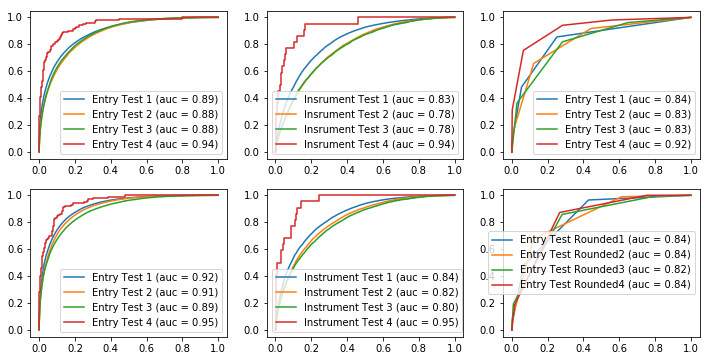

In [368]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
for i in range(4):
    Z_sub = X.dot(Y[:, cols[i]])
    entry_sub = entry_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z_sub[entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Entry Test %d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()
    
plt.subplot(2, 3, 2)
for i in range(4):
    Z_sub = X.dot(Y[:, cols[i]])
    entry_sub = instrument_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z_sub[entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Insrument Test %d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()

plt.subplot(2, 3, 3)
for i in range(4):
    entry_sub = entry_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z[:, has_col[i]][entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Entry Test %d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()
    
plt.subplot(2, 3, 4)
for i in range(4):
    Z_sub = Z_mice[:, has_col[i]]
    entry_sub = entry_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z_sub[entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Entry Test %d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()
    
plt.subplot(2, 3, 5)
for i in range(4):
    Z_sub = Z_mice[:, has_col[i]]
    entry_sub = instrument_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z_sub[entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Instrument Test %d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()

plt.subplot(2, 3, 6)
for i in range(4):
    entry_sub = entry_test_data[:, has_col[i]]
    entries = ~np.isnan(entry_sub)
    
    fpr, tpr, _ = roc_curve(entry_sub[entries]>(i+1), Z_mice_round[:, has_col[i]][entries])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Entry Test Rounded%d (auc = %0.2f)' % ((i+1), roc_auc))
plt.legend()

plt.show()

1379
1200
1200


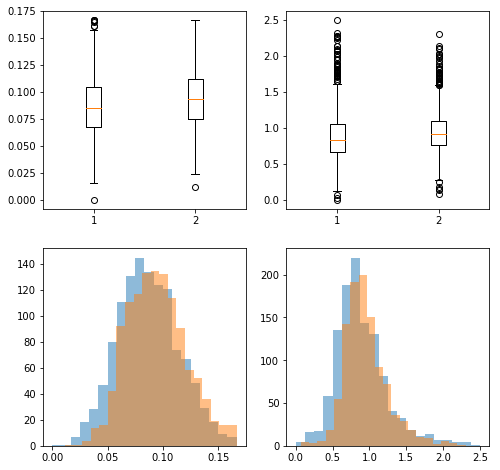

In [375]:
import csv
import random
from collections import Counter, defaultdict
from scipy import spatial

# Are family members more similar?
with open('../data/all_samples.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    family = [(x[5], x[8]) for i, x in enumerate(reader) if i in keep and x[1] not in {'Control', 'None'}]
    
family_to_indices = defaultdict(list)
for i, f in enumerate(family):
    if f[1] != 'None':
        family_to_indices[f].append(i)
    
print(len([f for f, v in family_to_indices.items() if len(v) > 1]))
num_pairs = 1200

# Randomly select sibling pairs
selected_families = random.sample([f for f, v in family_to_indices.items() if len(v) > 1], num_pairs)
sibling_pairs = [tuple(random.sample(family_to_indices[f], 2)) for f in selected_families]
print(len(sibling_pairs))

# Randomly select unrelated pairs
family_pairs = [random.sample(selected_families, 2) for _ in range(num_pairs)]
unrelated_pairs = [(random.choice(family_to_indices[i]), random.choice(family_to_indices[j])) for i, j in family_pairs]
print(len(unrelated_pairs))

sibling_cosine_d = [spatial.distance.cityblock(X[i, :], X[j, :])/12 for i, j in sibling_pairs]
unrelated_cosine_d = [spatial.distance.cityblock(X[i, :], X[j, :])/12 for i, j in unrelated_pairs]


sibling_cosine_orig = []
unrelated_cosine_orig = []

for i, j in sibling_pairs:
    indices = ~np.isnan(train_data[i, :]) & ~np.isnan(train_data[j, :])
    if sum(indices) > 0:
        sibling_cosine_orig.append(spatial.distance.cityblock(train_data[i, indices], train_data[j, indices])/sum(indices))
    
for i, j in unrelated_pairs:
    indices = ~np.isnan(train_data[i, :]) & ~np.isnan(train_data[j, :])
    if sum(indices) > 0:
        unrelated_cosine_orig.append(spatial.distance.cityblock(train_data[i, indices], train_data[j, indices])/sum(indices))

#sibling_cosine_d_Z_mice = [spatial.distance.euclidean(Z_mice[i, :], Z_mice[j, :]) for i, j in sibling_pairs]
#unrelated_cosine_d_Z_mice = [spatial.distance.euclidean(Z_mice[i, :], Z_mice[j, :]) for i, j in unrelated_pairs]

# multiple box plots on one figure
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.boxplot([sibling_cosine_d, unrelated_cosine_d])
plt.subplot(2, 2, 2)
plt.boxplot([sibling_cosine_orig, unrelated_cosine_orig])
plt.subplot(2, 2, 3)
plt.hist(sibling_cosine_d, bins=20, alpha=0.5)
plt.hist(unrelated_cosine_d, bins=20, alpha=0.5)
plt.subplot(2, 2, 4)
plt.hist(sibling_cosine_orig, bins=20, alpha=0.5)
plt.hist(unrelated_cosine_orig, bins=20, alpha=0.5)
plt.show()

In [373]:
import scipy.stats as st

t, p = st.ttest_ind(sibling_cosine_d, unrelated_cosine_d)
print(t, p)

t, p = st.ttest_ind(sibling_cosine_orig, unrelated_cosine_orig)
print(t, p)

-6.02460158467 1.95665840297e-09
-5.62898515567 2.04779528043e-08


In [359]:
X = np.genfromtxt('../data/impute_bvs_l1_ordreg_X3.csv', delimiter=',').T[keep, :]
Y = np.genfromtxt('../data/impute_bvs_l1_ordreg_Y3.csv', delimiter=',')
Z = np.genfromtxt('../data/impute_bvs_l1_ordreg_Z3.csv', delimiter=',')[keep, :]

In [386]:
feature_to_cols = defaultdict(list)

m, n = train_data.shape
index = 0
for i in range(n):
    options = np.unique(train_data[:, i])
    options = options[~np.isnan(options)]
    num_options = int(max(max(options), 3))
    for j in range(num_options-1):
        feature_to_cols[i].append(index)
        index += 1
        
print(index)


689


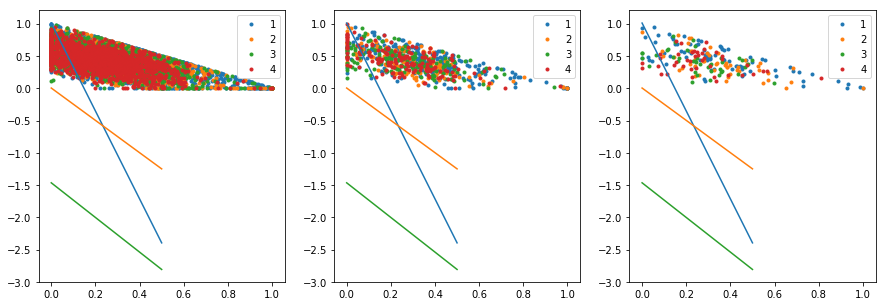

In [385]:
feature_index = 30

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
for i in range(1, 5):
    indices = train_data[:, feature_index]==i
    if sum(indices) > 0:
        plt.scatter(X[indices, 0], X[indices, 1], label=str(i), marker='.')
plt.legend()

# We're looking for the line y = mx + b such that
# ax + by + c = 0
# y = (-ax - c)/b
    
# We're looking for the line y = mx + b such that
# ax + by + (1-a-b)z + d = 0
# y = (-ax - c)/b
    
#xs = [ax1.get_xlim()[0], 0, ax1.get_xlim()[1]]
xs = [0, 0.5]
#f = lambda x: -Y[0, i]*x/Y[1, i]
f = lambda x: (-Y[0, i]*x - Y[-1, i])/Y[1, i]
for i in feature_to_cols[feature_index]:
    plt.plot(xs, [f(x) for x in xs])
    
plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
for i in range(1, 5):
    indices = entry_test_data[:, feature_index]==i
    if sum(indices) > 0:
        plt.scatter(X[indices, 0], X[indices, 1], label=str(i), marker='.')
plt.legend()
    
for i in feature_to_cols[feature_index]:
    plt.plot(xs, [f(x) for x in xs])
    
plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
for i in range(1, 5):
    indices = instrument_test_data[:, feature_index]==i
    if sum(indices) > 0:
        plt.scatter(X[indices, 0], X[indices, 1], label=str(i), marker='.')
plt.legend()
    
for i in feature_to_cols[feature_index]:
    plt.plot(xs, [f(x) for x in xs])
    
plt.show()